# Text Extraction and Dataset Creation

This document is mainly about extracting the text from the resumes, which are in doc and pdf formats, and make a dataset containing the extracted text. Currently the text data is in an unstructured format. So, in order to be able to use this data for model training it needs to be converted into a structured format.
 
After extracting the text and creating a dataset, we will be having in each row of the first column the text content inside each resume, and in each corresponding row of the second column we will be having to which category this resume belongs to. Once this dataset or dataframe is created it will be saved and then that dataset can be used for further steps like EDA, Text preprocessing, model building.

-------------

## Import the libraries

In [1]:
import os
import re
import nltk
import spacy
import string
import docx2txt
import textract
from PyPDF2 import PdfReader
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

-----------------

There are resumes from four different categories. So, a data frame should be created for each category separately and finally joined together as a single data frame.

One column represents the text data in each resume and the other column is about the category to which that resume belongs to.

So, a function can be created to extract the resume text from all the resumes in a particular folder and store that data in a list, that can be used to make a data frame later.

### A display of different types of files existing here

In [2]:
file_path   = r'Resumes/'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [3]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [4]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


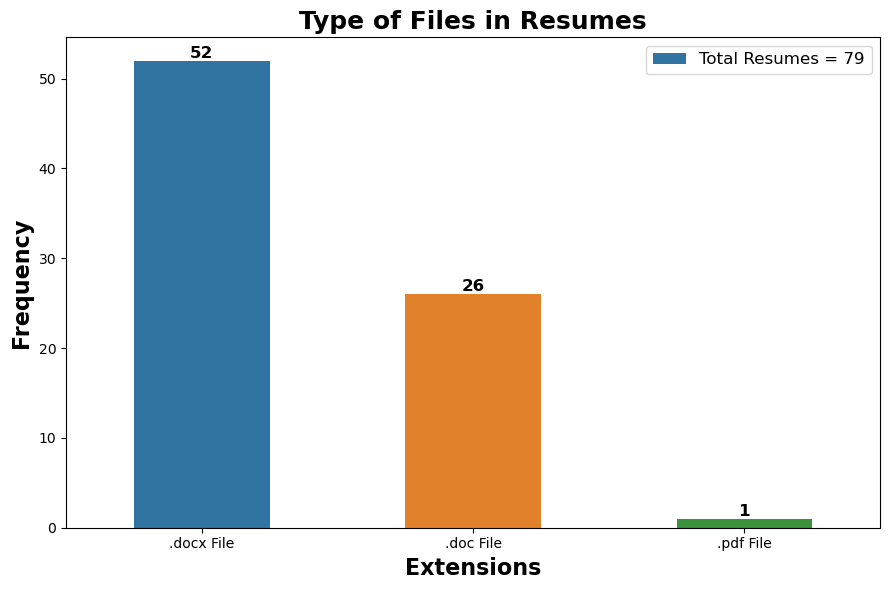

In [5]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

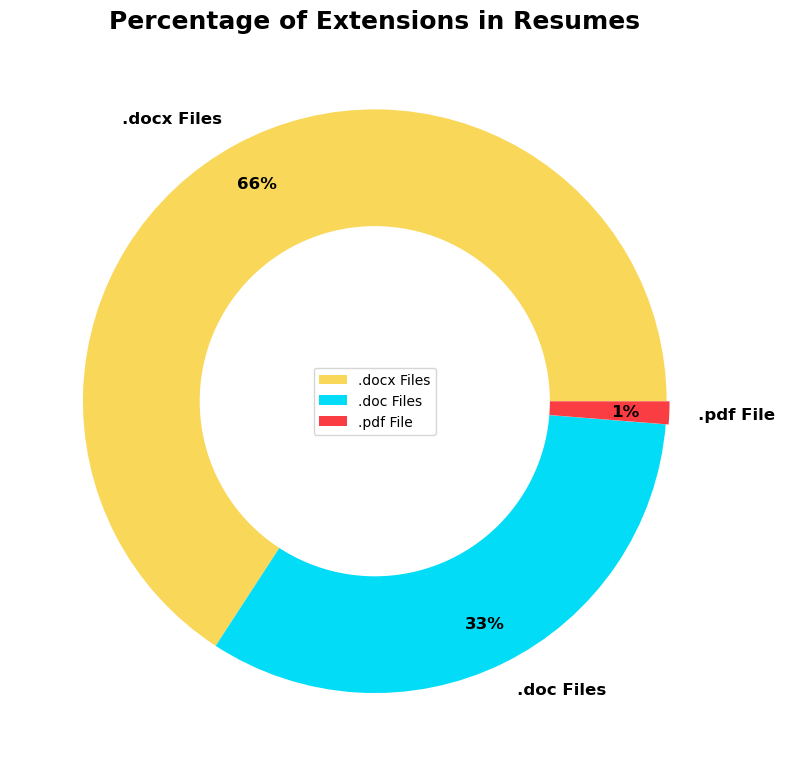

In [6]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85, 
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### A display of different categories of resumes present here

In [7]:
file_path = r'Resumes/'
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        #if file.endswith('.docx'):
        profile.append(folder)
        file_name.append(file)

In [8]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,PeopleSoft,Peoplesoft Admin_AnubhavSingh.docx
1,PeopleSoft,Peoplesoft Admin_G Ananda Rayudu.doc
2,PeopleSoft,Peoplesoft Admin_Gangareddy.doc
3,PeopleSoft,Peoplesoft Admin_Murali.docx
4,PeopleSoft,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...,...
74,Workday,Sri Krishna S_Hexaware.doc
75,Workday,Srikanth-Hexaware.docx
76,Workday,SSKumar_Hexaware.docx
77,Workday,Venkateswarlu B_Hexaware.doc


In [9]:
resume_data['Profile'].unique()

array(['PeopleSoft', 'ReactJS', 'SQL Developer', 'Workday'], dtype=object)

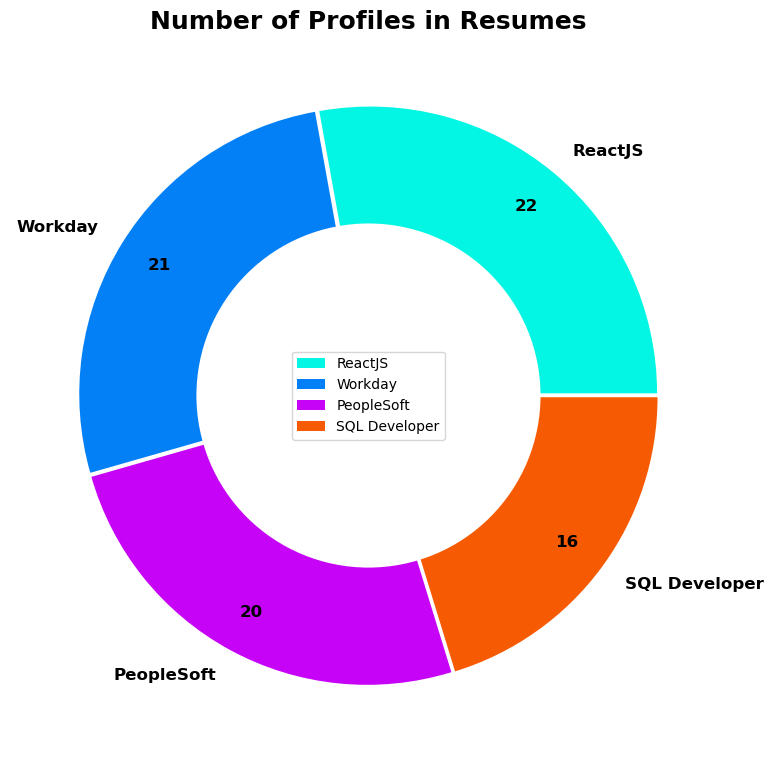

In [10]:
fig = plt.figure(figsize=(8,8))
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

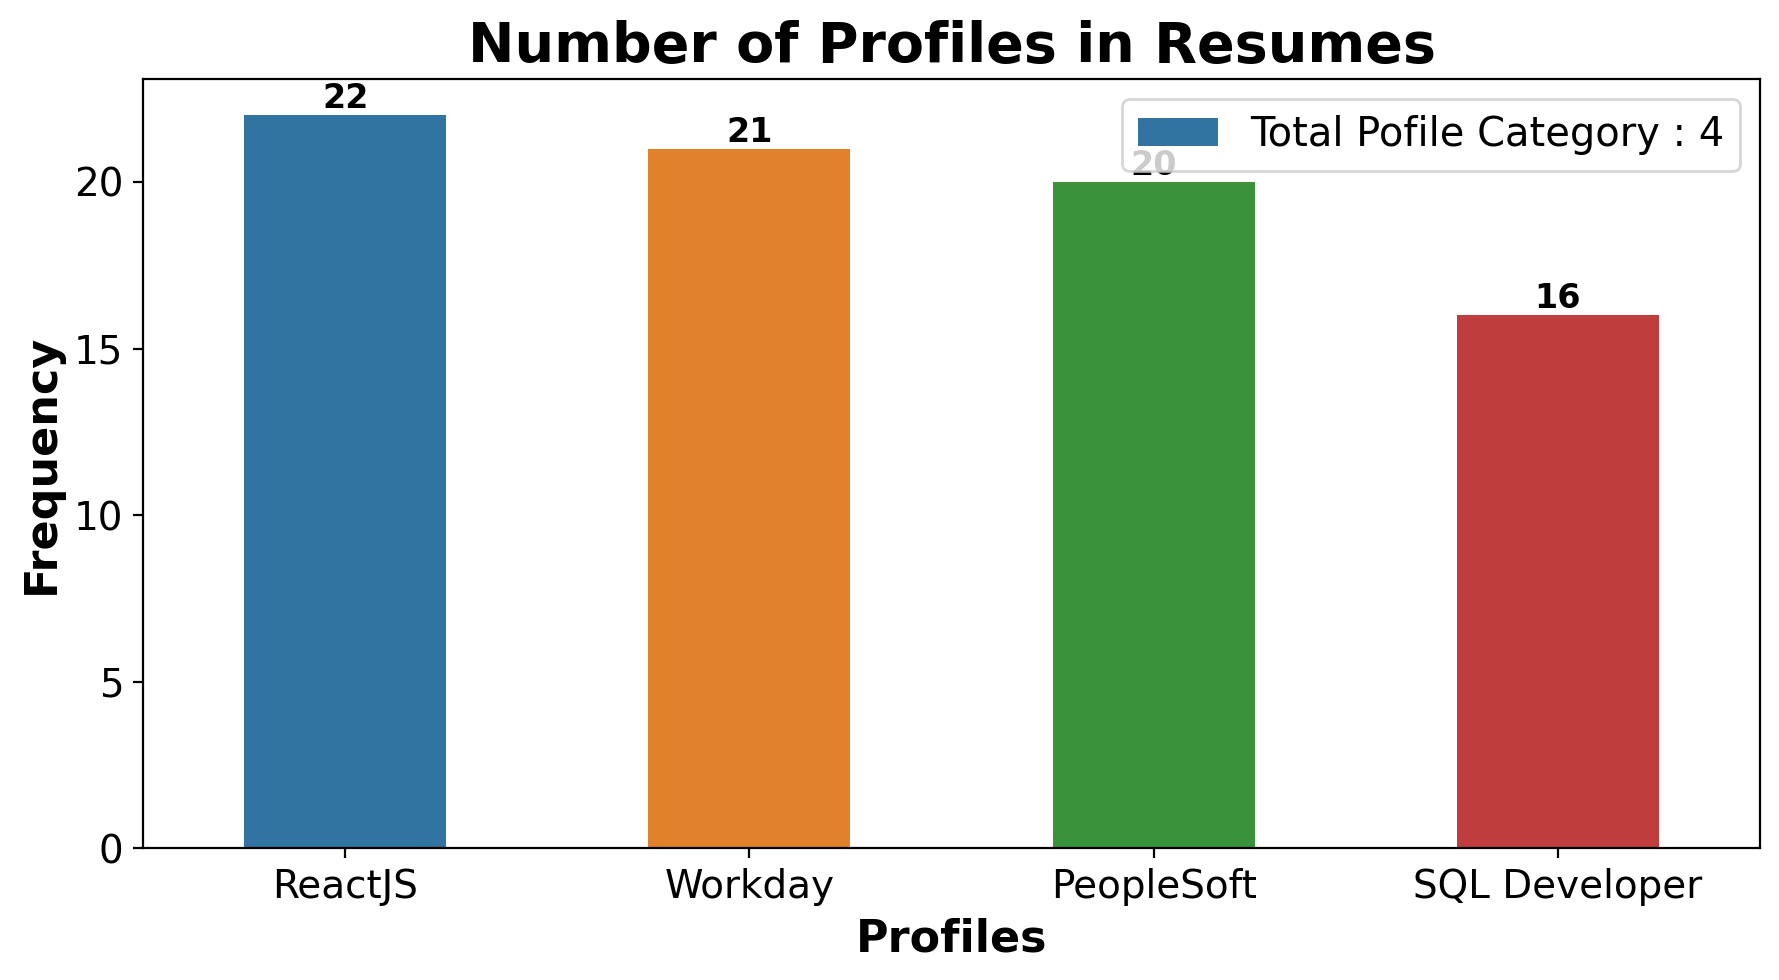

In [11]:
fig, axes = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(), width=0.5,
                 data= resume_data, ax= axes, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

axes.set_xlabel('Profiles', size=16,fontweight = 'bold')
axes.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### Function to extract text from resumes

In [14]:
import win32com.client
def resume_text(path, name):
    app = win32com.client.Dispatch('Word.Application')
    resume_data = []
    category = []
    directory = f'Resumes/{path}/'
    for resume in os.listdir(directory):
        if resume.endswith('.docx'):
            os.path.join(directory, resume)
            resume_data.append((textract.process(os.path.join(directory, resume))).decode('utf-8'))
            category.append(f'{name} Developer')
        elif resume.endswith('.doc'):
            doc = app.Documents.Open(f'{os.getcwd()}\\{os.path.join(directory, resume)}')
            doctext = doc.Content.Text
            doc.Close()
            resume_data.append(doctext)
            category.append(f'{name} Developer')
        elif resume.endswith('.pdf'):
            os.path.join(directory, resume)
            #resume_data.append((textract.process(os.path.join(directory, resume))).decode('utf-8'))
            reader = PdfReader(os.path.join(directory, resume))
            text = ""
            for page in reader.pages:
                text += page.extract_text() + "\n"
            resume_data.append(text)
            category.append(f'{name} Developer')
    app.Quit()
    return resume_data, category

In [15]:
os.getcwd()

'C:\\Users\\harivars\\NLP Project-3'

### For People Soft category

In [16]:
resume_data_ps, category_ps = resume_text('PeopleSoft', 'PeopleSoft')

In [17]:
data_ps = pd.DataFrame(data = resume_data_ps , columns = ['Resume_Info'])
data_ps['Category_ps'] = category_ps
data_ps

,Resume_Info,Category_ps
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft Developer
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,PeopleSoft Developer
2,PeopleSoft Database Administrator\r ...,PeopleSoft Developer
3,Classification: Internal\n\nClassification: In...,PeopleSoft Developer
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",PeopleSoft Developer
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft Developer
6,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...,PeopleSoft Developer
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft Developer
8,Vinod Akkala ...,PeopleSoft Developer
9,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...,PeopleSoft Developer


### For SQL category

In [18]:
resume_data_sql, category_sql = resume_text('SQL Developer', 'SQL')

In [19]:
data_sql = pd.DataFrame(data = resume_data_sql, columns = ['Resume_Info'])
data_sql['Category_sql'] = category_sql
data_sql

,Resume_Info,Category_sql
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,Name: Ravali P \n\n\n\n ...,SQL Developer
4,SUSOVAN BAG \n\nSeeking a challenging po...,SQL Developer
5,KAMBALLA PRADEEP ...,SQL Developer
6,\r\r Hyderabad\rNazeer Basha\rSQL and Power...,SQL Developer
7,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
8,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
9,SQL SER...,SQL Developer


### For ReactJS category

In [20]:
resume_data_rjs, category_rjs = resume_text('ReactJS', 'React JS')

In [21]:
data_rjs = pd.DataFrame(data = resume_data_rjs , columns = ['Resume_Info'])
data_rjs['Category_rjs'] = category_rjs
data_rjs

,Resume_Info,Category_rjs
0,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer
2,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
4,\r\r PROFILE\rSearching for the opportunity ...,React JS Developer
5,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer
6,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
7,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer
8,Maryala Vinay Reddy\r\rProfessional Summary:\t...,React JS Developer
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer


### For Workday category

In [22]:
resume_data_wd, category_wd = resume_text('Workday', 'Work_Day')

In [23]:
data_wd = pd.DataFrame(data = resume_data_wd , columns = ['Resume_Info'])
data_wd['Category_wd'] = category_wd
data_wd

,Resume_Info,Category_wd
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Work_Day Developer
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Work_Day Developer
2,Hari Krishna M\r\r\rSummary:\rA result oriente...,Work_Day Developer
3,Harikrishna Akula ...,Work_Day Developer
4,HIMA.MENDU\r \r\rCareer Objective\rTo continu...,Work_Day Developer
5,G Himaja\n\n ...,Work_Day Developer
6,\t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\r\t\rP...,Work_Day Developer
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Work_Day Developer
8,\t\t\t\t\tMadeeswar A\r\t\r\t\rPROFILE SUMMARY...,Work_Day Developer
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,Work_Day Developer


### Combining into a single data frame

In [24]:
resume_data = data_ps.append([data_sql, data_rjs, data_wd], ignore_index = True)
resume_data

,Resume_Info,Category_ps,Category_sql,Category_rjs,Category_wd
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft Developer,NaN,NaN,NaN
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,PeopleSoft Developer,NaN,NaN,NaN
2,PeopleSoft Database Administrator\r ...,PeopleSoft Developer,NaN,NaN,NaN
3,Classification: Internal\n\nClassification: In...,PeopleSoft Developer,NaN,NaN,NaN
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",PeopleSoft Developer,NaN,NaN,NaN
...,...,...,...,...,...
74,\tWorkday Integration Consultant\r\rName ...,NaN,NaN,NaN,Work_Day Developer
75,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Work_Day Developer
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Work_Day Developer
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Work_Day Developer


In [25]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Resume_Info   79 non-null     object
 1   Category_ps   20 non-null     object
 2   Category_sql  16 non-null     object
 3   Category_rjs  22 non-null     object
 4   Category_wd   21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


### Merging the 4 categories into a single category column

In [26]:
resume_data['Category'] = category_ps + category_sql + category_rjs + category_wd
resume_data

,Resume_Info,Category_ps,Category_sql,Category_rjs,Category_wd,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft Developer,NaN,NaN,NaN,PeopleSoft Developer
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,PeopleSoft Developer,NaN,NaN,NaN,PeopleSoft Developer
2,PeopleSoft Database Administrator\r ...,PeopleSoft Developer,NaN,NaN,NaN,PeopleSoft Developer
3,Classification: Internal\n\nClassification: In...,PeopleSoft Developer,NaN,NaN,NaN,PeopleSoft Developer
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",PeopleSoft Developer,NaN,NaN,NaN,PeopleSoft Developer
...,...,...,...,...,...,...
74,\tWorkday Integration Consultant\r\rName ...,NaN,NaN,NaN,Work_Day Developer,Work_Day Developer
75,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Work_Day Developer,Work_Day Developer
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Work_Day Developer,Work_Day Developer
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Work_Day Developer,Work_Day Developer


### Final data frame

In [27]:
resume_data = resume_data[["Category", "Resume_Info"]]

In [28]:
resume_data

,Category,Resume_Info
0,PeopleSoft Developer,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft Developer,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2,PeopleSoft Developer,PeopleSoft Database Administrator\r ...
3,PeopleSoft Developer,Classification: Internal\n\nClassification: In...
4,PeopleSoft Developer,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."
...,...,...
74,Work_Day Developer,\tWorkday Integration Consultant\r\rName ...
75,Work_Day Developer,Srikanth (WORKDAY hCM Consultant)\t ...
76,Work_Day Developer,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
77,Work_Day Developer,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [29]:
import csv
resume_data.to_csv('Resume_data.csv', index=False)

--------------

With this the final dataset containing all the text data from the resumes and the respective categories have been arranged in the rows. And this dataset is saved. After this we can proceed with the text preprocessing and the EDA.